In [1]:
from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True, linewidth=120)

,time,ind_fact,ind_x,seg_fact_0,seg_x_0,seg_fact_1,seg_x_1,sub_fact_0,sub_x_0,sub_fact_1,...,y_1_0,y_1_1,y_1_2,y_1_3,y_1_4,y_1_5,y_1_6,y_1_7,y_1_8,y_1_9
0,2006-01-01,0.617965,0.654700,1.874610,1.662357,-1.856342,-0.136216,0.131815,0.200695,-0.855629,...,0.612904,1.122167,0.641444,1.237861,0.205028,-0.114191,-1.055274,-0.586292,-0.444225,-1.708461
1,2006-02-01,0.834329,0.525347,1.173495,-0.138732,-0.673056,0.626384,-0.613672,-0.666398,-0.587711,...,1.101854,0.584430,0.928860,0.265959,-0.095448,1.368390,1.949842,-0.234705,1.608132,0.400920
2,2006-03-01,-0.619074,-1.036238,-0.570383,-1.391830,-1.295677,-0.824538,-1.290889,-1.045420,-0.891480,...,-0.464078,-0.705994,-0.632310,-2.008708,-0.564235,0.007477,-0.682714,0.045090,-1.485462,-0.169579
3,2006-04-01,-0.951931,-0.642394,-0.680357,-0.281089,-0.419522,0.487452,-1.074813,-0.558457,-1.156357,...,-0.451447,0.449040,-0.776738,-1.478618,-0.076996,0.743223,-3.504534,-0.425112,-0.545902,-0.535795
4,2006-05-01,-0.622445,-0.146479,-1.998468,-1.522219,-2.710251,-2.416586,0.694722,1.124647,1.219728,...,-2.075593,-0.248548,-0.192625,-1.402893,-1.727141,-1.216764,-3.592000,-0.074013,-1.179536,-2.333393


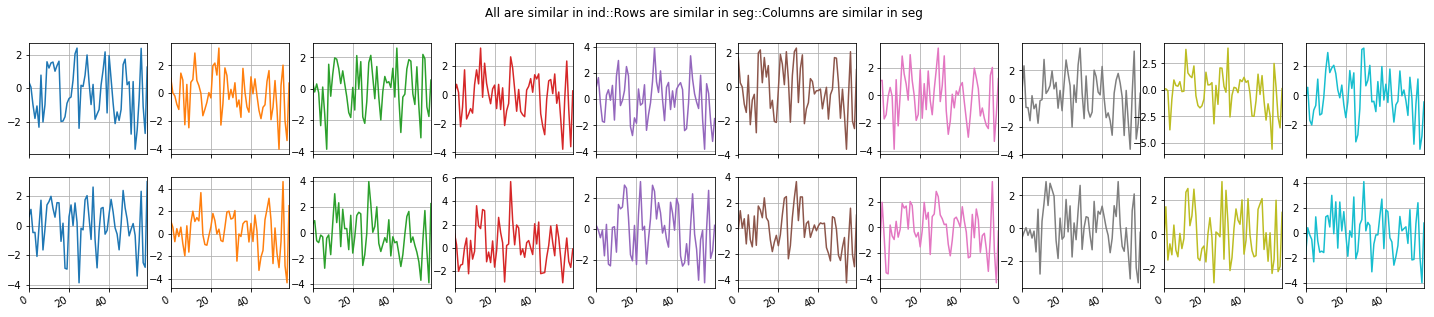

In [3]:
###simulate time series data 
periods=200
seed=98165
# factor_model=pd.DataFrame(pd.date_range(start='1/1/2018', end='2/1/2019', freq='M', normalize=True),columns=['time']).astype('datetime64[M]')

factor_model=pd.DataFrame(pd.date_range(start='1/1/2006', periods=periods, freq='M', normalize=True),columns=['time']).astype('datetime64[M]')

np.random.seed(seed)

def factor_gen(size=periods, beta=0.8, burner=2, scale=1):
    j=burner+size
    x=np.random.normal(loc=0.0, scale=scale, size=j)
    
    y=[0]*j
    for i in range(j):
        
        if i==0:
            y0=0 
        else:
            y[i]=beta*y0 + x[i]
            y0=y[i]
            
    return y[-size:], x[-size:]

###industry factor
fact_name='ind_fact'
fact_name_x='ind_x'
fact, fact_x = factor_gen(size=periods, beta=0.5, burner=200)
factor_model[fact_name]=fact 
factor_model[fact_name_x]=fact_x 

###segment factor
seg=2
sub=10
for i in range(seg):
    fact_name='seg_fact_'+str(i)
    fact_name_x='seg_x_'+str(i)
    fact, fact_x = factor_gen(size=periods, beta=0.7, burner=200)
    factor_model[fact_name]=fact 
    factor_model[fact_name_x]=fact_x 

###brand factor
for i in range(sub):
    fact_name='sub_fact_'+str(i)
    fact_name_x='sub_x_'+str(i)
    fact, fact_x = factor_gen(size=periods, beta=0.4, burner=200)
    factor_model[fact_name]=fact 
    factor_model[fact_name_x]=fact_x 
    
###idiosyncratic factor
for s in range(seg):
    for b in range(sub):
        fact_name='idi_fact_' + str(s) + '_' + str(b)
        fact_name_x='idi_fact_x' + str(s) + '_' + str(b)
        fact, fact_x = factor_gen(size=periods, beta=0.0, burner=200, scale=1)
        factor_model[fact_name]=fact
        factor_model[fact_name_x]=fact_x

factor_model['x1']=pd.DataFrame(np.random.normal(loc=0.0, scale=1, size=periods))
factor_model['x2']=pd.DataFrame(np.random.normal(loc=0.0, scale=1, size=periods))  
factor_model['x3']=pd.DataFrame(np.random.normal(loc=0.0, scale=1, size=periods)) 
factor_model['x4']=pd.DataFrame(np.random.normal(loc=0.0, scale=1, size=periods)) 
factor_model['x5']=pd.DataFrame(np.random.normal(loc=0.0, scale=1, size=periods)) 
factor_model['x6']=pd.DataFrame(np.random.normal(loc=0.0, scale=1, size=periods))
factor_model['x7']=pd.DataFrame(np.random.normal(loc=0.0, scale=1, size=periods))
factor_model['x8']=pd.DataFrame(np.random.normal(loc=0.0, scale=1, size=periods)) 
factor_model['x9']=pd.DataFrame(np.random.normal(loc=0.0, scale=1, size=periods))
factor_model['x10']=pd.DataFrame(np.random.normal(loc=0.0, scale=1, size=periods))


        
###observed y --output

for s in range(seg):
    for b in range(sub):
        fact_name='y_' + str(s) + '_' + str(b)
        seg_fact='seg_fact_' + str(s)
        sub_fact='sub_fact_' + str(b)
        idi_fact= 'idi_fact_' + str(s) + '_' + str(b)
#         factor_model[fact_name]=factor_model['ind_fact']+factor_model[seg_fact] + factor_model[sub_fact] + factor_model[idi_fact]
#         factor_model[fact_name]=factor_model['ind_fact'] +factor_model[seg_fact] + factor_model[idi_fact] + 2*factor_model['x1'] -  2*factor_model['x2']
        factor_model[fact_name]=factor_model['ind_fact']  + factor_model[idi_fact] + 0.2*factor_model['x1'] -  0.2*factor_model['x2'] \
        + 0.2*factor_model['x3'] -  0.2*factor_model['x4'] + 0.2*factor_model['x5'] -  0.2*factor_model['x6'] \
        + 0.2*factor_model['x7'] -  0.2*factor_model['x8'] + 0.2*factor_model['x9'] -  0.2*factor_model['x10'] 
        factor_model[fact_name_x]=fact_x
    
# print(factor_model.columns)
_=factor_model[[name for name in factor_model.columns if 'y_' in name]][(
    factor_model.time.dt.year<=2010)].plot(subplots=True, layout=( seg,sub), figsize=(25, 5), grid=True, legend=False, 
                                           title='All are similar in ind::Rows are similar in seg::Columns are similar in seg')
factor_model.head(5)

In [4]:
endog=factor_model[['y_0_0','y_0_1','y_0_2','y_1_0','y_1_2','y_1_3']]
exog=factor_model[['x1','x2']]

In [5]:
mod = sm.tsa.DynamicFactor(endog, exog=exog, k_factors=2, factor_order=1) #exog=exog1,

In [ ]:
###take a look of this instance

In [15]:
list_terms=dir(mod)
pass_list=['__dict__','exog','endog']
for term in list_terms:
    if term not in pass_list: 
        string='mod.'+term
        print('>>>> '+ string + '<<<<\n', eval(string))

>>>> mod.__class__<<<<
 <class 'statsmodels.tsa.statespace.dynamic_factor.DynamicFactor'>
>>>> mod.__delattr__<<<<
 <method-wrapper '__delattr__' of DynamicFactor object at 0x000001DD7A768E10>
>>>> mod.__dir__<<<<
 <built-in method __dir__ of DynamicFactor object at 0x000001DD7A768E10>
>>>> mod.__doc__<<<<
 
    Dynamic factor model

    Parameters
    ----------
    endog : array_like
        The observed time-series process :math:`y`
    exog : array_like, optional
        Array of exogenous regressors for the observation equation, shaped
        nobs x k_exog.
    k_factors : int
        The number of unobserved factors.
    factor_order : int
        The order of the vector autoregression followed by the factors.
    error_cov_type : {'scalar', 'diagonal', 'unstructured'}, optional
        The structure of the covariance matrix of the observation error term,
        where "unstructured" puts no restrictions on the matrix, "diagonal"
        requires it to be any diagonal matrix (un

In [20]:
list_matrix=['state_cov','obs_cov','state_intercept','obs_intercept','design','transition','selection','err_transition']

for name in list_matrix:
    try:
        print(name,'\n', mod.ssm[name],'\n',mod.ssm[name].shape)
    except:
        pass


state_cov 
 [[1. 0.]
 [0. 1.]] 
 (2, 2)
obs_cov 
 [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]] 
 (6, 6)
state_intercept 
 [0. 0.] 
 (2,)
obs_intercept 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 (6, 200)
design 
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 
 (6, 2)
transition 
 [[0. 0.]
 [0. 0.]] 
 (2, 2)
selection 
 [[1. 0.]
 [0. 1.]] 
 (2, 2)


In [21]:
initial_res = mod.fit(method='powell', disp=True)
res = mod.fit(initial_res.params, disp=True, maxiter=5000)

Optimization terminated successfully.
         Current function value: 9.451653
         Iterations: 14
         Function evaluations: 5035


In [30]:
np.set_printoptions(precision=4, suppress=True, linewidth=120)
list_matrix=['state_cov','obs_cov','state_intercept','obs_intercept','design','transition','selection','err_transition']

for name in list_matrix:
    try:
        print(name,'\n', mod.ssm[name],'\n',mod.ssm[name].shape)
    except:
        pass
res.params

state_cov 
 [[1. 0.]
 [0. 1.]] 
 (2, 2)
obs_cov 
 [[0.     0.     0.     0.     0.     0.    ]
 [0.     1.2573 0.     0.     0.     0.    ]
 [0.     0.     0.7701 0.     0.     0.    ]
 [0.     0.     0.     1.0255 0.     0.    ]
 [0.     0.     0.     0.     0.8688 0.    ]
 [0.     0.     0.     0.     0.     0.9161]] 
 (6, 6)
state_intercept 
 [0. 0.] 
 (2,)
obs_intercept 
 [[-0.1119 -0.0744 -0.0187 ...  0.229  -0.1854 -0.3235]
 [-0.3427 -0.4121 -0.0327 ...  0.4412 -0.201  -0.8479]
 [-0.2711 -0.2806 -0.0319 ...  0.4133 -0.2495 -0.7061]
 [-0.1998 -0.2605 -0.0164 ...  0.2287 -0.0769 -0.4787]
 [-0.2578 -0.3363 -0.0211 ...  0.295  -0.0991 -0.6176]
 [-0.0475 -0.0833 -0.001  ...  0.0241  0.0244 -0.0971]] 
 (6, 200)
design 
 [[-1.427  -0.2189]
 [-0.8976  0.4218]
 [-0.9439  0.6993]
 [-0.9941  0.5546]
 [-0.9628  0.6584]
 [-1.0338  0.5801]] 
 (6, 2)
transition 
 [[ 0.2666 -0.0763]
 [-0.0967  0.0391]] 
 (2, 2)
selection 
 [[1. 0.]
 [0. 1.]] 
 (2, 2)


loading.f1.y_0_0   -1.427023e+00
loading.f2.y_0_0   -2.188650e-01
loading.f1.y_0_1   -8.975668e-01
loading.f2.y_0_1    4.218103e-01
loading.f1.y_0_2   -9.439472e-01
loading.f2.y_0_2    6.992890e-01
loading.f1.y_1_0   -9.941304e-01
loading.f2.y_1_0    5.546049e-01
loading.f1.y_1_2   -9.628196e-01
loading.f2.y_1_2    6.583614e-01
loading.f1.y_1_3   -1.033803e+00
loading.f2.y_1_3    5.801309e-01
beta.x1.y_0_0       9.588525e-02
beta.x2.y_0_0      -1.292793e-01
beta.x1.y_0_1       3.789303e-01
beta.x2.y_0_1      -1.447017e-01
beta.x1.y_0_2       2.787889e-01
beta.x2.y_0_2      -1.764677e-01
beta.x1.y_1_0       2.302689e-01
beta.x2.y_1_0      -5.680986e-02
beta.x1.y_1_2       2.972176e-01
beta.x2.y_1_2      -7.316589e-02
beta.x1.y_1_3       6.462218e-02
beta.x2.y_1_3       1.570487e-02
sigma2.y_0_0        5.199740e-08
sigma2.y_0_1        1.257287e+00
sigma2.y_0_2        7.700919e-01
sigma2.y_1_0        1.025470e+00
sigma2.y_1_2        8.687507e-01
sigma2.y_1_3        9.161370e-01
L1.f1.f1  

In [39]:
df_coef=pd.DataFrame(res.params)

In [60]:
x_intercept=pd.DataFrame(mod.ssm['obs_intercept'].T,columns=['x1','x2','x3','x4','x5','x6'])
exog['x1_e']=df_coef[df_coef.index=='beta.x1.y_0_0'][0].values*exog['x1'] + df_coef[df_coef.index=='beta.x2.y_0_0'][0].values*exog['x2'] 
exog['x1_m']=x_intercept['x1']

C:\Users\jshi2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jshi2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
exog

,x1,x2,x1_e,x1_m
0,-0.800578,0.271599,-0.111876,-0.111876
1,-1.211002,-0.323005,-0.074359,-0.074359
2,-0.043339,0.112532,-0.018704,-0.018704
3,0.271288,0.307376,-0.013725,-0.013725
4,0.374082,1.483771,-0.155952,-0.155952
5,-0.303879,-0.867852,0.083058,0.083058
6,-0.614850,1.300779,-0.227119,-0.227119
7,0.329284,-1.071010,0.170033,0.170033
8,0.570551,-1.139674,0.202044,0.202044
9,-1.923842,0.337097,-0.228048,-0.228048


In [63]:
res.summary(separate_params=False)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                             Statespace Model Results                                             
==================================================================================================================
Dep. Variable:     ['y_0_0', 'y_0_1', 'y_0_2', 'y_1_0', 'y_1_2', 'y_1_3']   No. Observations:                  200
Model:                                  DynamicFactor(factors=2, order=1)   Log Likelihood               -1890.065
                                                           + 2 regressors   AIC                           3848.130
Date:                                                    Fri, 12 Feb 2021   BIC                           3960.273
Time:                                                            00:12:23   HQIC                          3893.513
Sample:                                                                 0                                         
                                                                    - 200                                         
Covariance Type:                                                      opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
loading.f1.y_0_0    -1.4270      0.954     -1.495      0.135      -3.297       0.443
loading.f2.y_0_0    -0.2189      1.162     -0.188      0.851      -2.497       2.059
loading.f1.y_0_1    -0.8976      0.221     -4.058      0.000      -1.331      -0.464
loading.f2.y_0_1     0.4218      0.350      1.204      0.229      -0.265       1.109
loading.f1.y_0_2    -0.9439      0.122     -7.737      0.000      -1.183      -0.705
loading.f2.y_0_2     0.6993      0.109      6.388      0.000       0.485       0.914
loading.f1.y_1_0    -0.9941      0.172     -5.766      0.000      -1.332      -0.656
loading.f2.y_1_0     0.5546      0.284      1.951      0.051      -0.002       1.112
loading.f1.y_1_2    -0.9628      0.120     -7.998      0.000      -1.199      -0.727
loading.f2.y_1_2     0.6584      0.154      4.279      0.000       0.357       0.960
loading.f1.y_1_3    -1.0338      0.191     -5.408      0.000      -1.408      -0.659
loading.f2.y_1_3     0.5801      0.304      1.907      0.057      -0.016       1.176
beta.x1.y_0_0        0.0959      0.120      0.797      0.425      -0.140       0.332
beta.x2.y_0_0       -0.1293      0.107     -1.203      0.229      -0.340       0.081
beta.x1.y_0_1        0.3789      0.146      2.600      0.009       0.093       0.665
beta.x2.y_0_1       -0.1447      0.108     -1.342      0.180      -0.356       0.067
beta.x1.y_0_2        0.2788      0.120      2.328      0.020       0.044       0.514
beta.x2.y_0_2       -0.1765      0.115     -1.538      0.124      -0.401       0.048
beta.x1.y_1_0        0.2303      0.136      1.691      0.091      -0.037       0.497
beta.x2.y_1_0       -0.0568      0.103     -0.551      0.582      -0.259       0.145
beta.x1.y_1_2        0.2972      0.139      2.145      0.032       0.026       0.569
beta.x2.y_1_2       -0.0732      0.111     -0.659      0.510      -0.291       0.144
beta.x1.y_1_3        0.0646      0.139      0.464      0.643      -0.209       0.338
beta.x2.y_1_3        0.0157      0.110      0.142      0.887      -0.200       0.232
sigma2.y_0_0        5.2e-08      3.173   1.64e-08      1.000      -6.220       6.220
sigma2.y_0_1         1.2573      0.177      7.095      0.000       0.910       1.605
sigma2.y_0_2         0.7701      0.146      5.277      0.000       0.484       1.056
sigma2.y_1_0         1.0255      0.141      7.267      0.000       0.749       1.302
sigma2.y_1_2         0.8688      0.127      6.846      0.000       0.620       1.117
sigma2.y_1_3         0.9161      0.131      7.017      0.000       0.660       1.1

## Extended the general model with fixed parameters 

In [74]:
endog=factor_model[['y_0_0','y_0_1','y_0_2','y_1_0','y_1_2','y_1_3']]
exog=factor_model[['x1','x2']]

In [77]:
# case 0) reproduce the results with no constrainsts
from statsmodels.tsa.statespace import tools
class ExtendedDFM(sm.tsa.DynamicFactor):
    def __init__(self, endog, exog=exog,  **kwargs):
            # Setup the model as if we had a factor order of 4
            super(ExtendedDFM, self).__init__(
                endog,  exog=exog, k_factors=2, factor_order=1, **kwargs)


In [78]:
mod_ext = ExtendedDFM(endog, exog=exog) 
initial_res_ext = mod_ext.fit(method='powell', disp=True)
res_ext = mod_ext.fit(initial_res_ext.params, disp=True, maxiter=5000)
res_ext.summary(separate_params=False)

Optimization terminated successfully.
         Current function value: 9.451653
         Iterations: 14
         Function evaluations: 5035


<class 'statsmodels.iolib.summary.Summary'>
"""
                                             Statespace Model Results                                             
==================================================================================================================
Dep. Variable:     ['y_0_0', 'y_0_1', 'y_0_2', 'y_1_0', 'y_1_2', 'y_1_3']   No. Observations:                  200
Model:                                  DynamicFactor(factors=2, order=1)   Log Likelihood               -1890.065
                                                           + 2 regressors   AIC                           3848.130
Date:                                                    Fri, 12 Feb 2021   BIC                           3960.273
Time:                                                            15:51:53   HQIC                          3893.513
Sample:                                                                 0                                         
                                                                    - 200                                         
Covariance Type:                                                      opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
loading.f1.y_0_0    -1.4270      0.954     -1.495      0.135      -3.297       0.443
loading.f2.y_0_0    -0.2189      1.162     -0.188      0.851      -2.497       2.059
loading.f1.y_0_1    -0.8976      0.221     -4.058      0.000      -1.331      -0.464
loading.f2.y_0_1     0.4218      0.350      1.204      0.229      -0.265       1.109
loading.f1.y_0_2    -0.9439      0.122     -7.737      0.000      -1.183      -0.705
loading.f2.y_0_2     0.6993      0.109      6.388      0.000       0.485       0.914
loading.f1.y_1_0    -0.9941      0.172     -5.766      0.000      -1.332      -0.656
loading.f2.y_1_0     0.5546      0.284      1.951      0.051      -0.002       1.112
loading.f1.y_1_2    -0.9628      0.120     -7.998      0.000      -1.199      -0.727
loading.f2.y_1_2     0.6584      0.154      4.279      0.000       0.357       0.960
loading.f1.y_1_3    -1.0338      0.191     -5.408      0.000      -1.408      -0.659
loading.f2.y_1_3     0.5801      0.304      1.907      0.057      -0.016       1.176
beta.x1.y_0_0        0.0959      0.120      0.797      0.425      -0.140       0.332
beta.x2.y_0_0       -0.1293      0.107     -1.203      0.229      -0.340       0.081
beta.x1.y_0_1        0.3789      0.146      2.600      0.009       0.093       0.665
beta.x2.y_0_1       -0.1447      0.108     -1.342      0.180      -0.356       0.067
beta.x1.y_0_2        0.2788      0.120      2.328      0.020       0.044       0.514
beta.x2.y_0_2       -0.1765      0.115     -1.538      0.124      -0.401       0.048
beta.x1.y_1_0        0.2303      0.136      1.691      0.091      -0.037       0.497
beta.x2.y_1_0       -0.0568      0.103     -0.551      0.582      -0.259       0.145
beta.x1.y_1_2        0.2972      0.139      2.145      0.032       0.026       0.569
beta.x2.y_1_2       -0.0732      0.111     -0.659      0.510      -0.291       0.144
beta.x1.y_1_3        0.0646      0.139      0.464      0.643      -0.209       0.338
beta.x2.y_1_3        0.0157      0.110      0.142      0.887      -0.200       0.232
sigma2.y_0_0        5.2e-08      3.173   1.64e-08      1.000      -6.220       6.220
sigma2.y_0_1         1.2573      0.177      7.095      0.000       0.910       1.605
sigma2.y_0_2         0.7701      0.146      5.277      0.000       0.484       1.056
sigma2.y_1_0         1.0255      0.141      7.267      0.000       0.749       1.302
sigma2.y_1_2         0.8688      0.127      6.846      0.000       0.620       1.117
sigma2.y_1_3         0.9161      0.131      7.017      0.000       0.660       1.1

In [79]:
#case 1) fixed all error cov as 1

from statsmodels.tsa.statespace import tools
class ExtendedDFM(sm.tsa.DynamicFactor):
    def __init__(self, endog, exog=exog,  **kwargs):
            # Setup the model as if we had a factor order of 4
            super(ExtendedDFM, self).__init__(
                endog,  exog=exog, k_factors=2, factor_order=1, **kwargs)

    def update(self, params, transformed=True, **kwargs):
        params[self._params_error_cov] = 1
        super(ExtendedDFM, self).update(params, transformed=True, **kwargs)

mod_ext = ExtendedDFM(endog, exog=exog) 
initial_res_ext = mod_ext.fit(method='powell', disp=True)
res_ext = mod_ext.fit(initial_res_ext.params, disp=True, maxiter=5000)
res_ext.summary(separate_params=False)

Optimization terminated successfully.
         Current function value: 9.464151
         Iterations: 11
         Function evaluations: 3889


<class 'statsmodels.iolib.summary.Summary'>
"""
                                             Statespace Model Results                                             
==================================================================================================================
Dep. Variable:     ['y_0_0', 'y_0_1', 'y_0_2', 'y_1_0', 'y_1_2', 'y_1_3']   No. Observations:                  200
Model:                                  DynamicFactor(factors=2, order=1)   Log Likelihood               -1892.514
                                                           + 2 regressors   AIC                           3853.028
Date:                                                    Fri, 12 Feb 2021   BIC                           3965.171
Time:                                                            15:55:59   HQIC                          3898.411
Sample:                                                                 0                                         
                                                                    - 200                                         
Covariance Type:                                                      opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
loading.f1.y_0_0    -1.0593      0.136     -7.792      0.000      -1.326      -0.793
loading.f2.y_0_0     0.0023      2.808      0.001      0.999      -5.501       5.505
loading.f1.y_0_1    -1.0125      0.110     -9.225      0.000      -1.228      -0.797
loading.f2.y_0_1    -0.0047      1.658     -0.003      0.998      -3.254       3.245
loading.f1.y_0_2    -1.0879      0.146     -7.441      0.000      -1.374      -0.801
loading.f2.y_0_2     0.0016      2.763      0.001      1.000      -5.413       5.416
loading.f1.y_1_0    -1.1474      0.112    -10.263      0.000      -1.367      -0.928
loading.f2.y_1_0    -0.0107      1.088     -0.010      0.992      -2.143       2.122
loading.f1.y_1_2    -1.1005      0.129     -8.520      0.000      -1.354      -0.847
loading.f2.y_1_2     0.0003      2.595      0.000      1.000      -5.086       5.087
loading.f1.y_1_3    -1.1240      0.132     -8.502      0.000      -1.383      -0.865
loading.f2.y_1_3     0.0018      2.881      0.001      0.999      -5.645       5.649
beta.x1.y_0_0        0.0983      0.126      0.779      0.436      -0.149       0.346
beta.x2.y_0_0       -0.0993      0.112     -0.886      0.376      -0.319       0.120
beta.x1.y_0_1        0.3761      0.122      3.078      0.002       0.137       0.616
beta.x2.y_0_1       -0.1158      0.092     -1.258      0.208      -0.296       0.065
beta.x1.y_0_2        0.2723      0.122      2.226      0.026       0.033       0.512
beta.x2.y_0_2       -0.1406      0.116     -1.208      0.227      -0.369       0.088
beta.x1.y_1_0        0.2325      0.127      1.833      0.067      -0.016       0.481
beta.x2.y_1_0       -0.0300      0.100     -0.300      0.764      -0.226       0.166
beta.x1.y_1_2        0.2917      0.136      2.148      0.032       0.026       0.558
beta.x2.y_1_2       -0.0379      0.101     -0.374      0.708      -0.236       0.161
beta.x1.y_1_3        0.0584      0.132      0.444      0.657      -0.199       0.316
beta.x2.y_1_3        0.0528      0.102      0.518      0.604      -0.147       0.252
sigma2.y_0_0         1.0000        nan        nan        nan         nan         nan
sigma2.y_0_1         1.0000        nan        nan        nan         nan         nan
sigma2.y_0_2         1.0000   2.88e-05   3.48e+04      0.000       1.000       1.000
sigma2.y_1_0         1.0000   2.88e-05   3.48e+04      0.000       1.000       1.000
sigma2.y_1_2         1.0000   2.88e-05   3.48e+04      0.000       1.000       1.000
sigma2.y_1_3         1.0000   2.88e-05   3.48e+04      0.000       1.000       1.0

In [83]:
#case 2) fixed all error cov as 1 + off diagonal in factor transition as 0

from statsmodels.tsa.statespace import tools
class ExtendedDFM(sm.tsa.DynamicFactor):
    def __init__(self, endog, exog=exog,  **kwargs):
            # Setup the model as if we had a factor order of 4
            super(ExtendedDFM, self).__init__(
                endog,  exog=exog, k_factors=2, factor_order=1, **kwargs)

    def update(self, params, transformed=True, **kwargs):
        params[self._params_error_cov] = 1
        params[31:33] = 0
        
        super(ExtendedDFM, self).update(params, transformed=True, **kwargs)

mod_ext = ExtendedDFM(endog, exog=exog) 
# initial_res_ext = mod_ext.fit(method='powell', disp=True)
init=[0.2]*31
init2=[0.0001,0.001,0.0001]
init=init.append(init2)
res_ext = mod_ext.fit(init, disp=True, maxiter=5000)
res_ext.summary(separate_params=False)

C:\Users\jshi2\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
C:\Users\jshi2\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                                             Statespace Model Results                                             
==================================================================================================================
Dep. Variable:     ['y_0_0', 'y_0_1', 'y_0_2', 'y_1_0', 'y_1_2', 'y_1_3']   No. Observations:                  200
Model:                                  DynamicFactor(factors=2, order=1)   Log Likelihood               -1893.770
                                                           + 2 regressors   AIC                           3855.539
Date:                                                    Fri, 12 Feb 2021   BIC                           3967.682
Time:                                                            16:14:40   HQIC                          3900.922
Sample:                                                                 0                                         
                                                                    - 200                                         
Covariance Type:                                                      opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
loading.f1.y_0_0    -1.0377      0.317     -3.274      0.001      -1.659      -0.416
loading.f2.y_0_0     0.3859      0.775      0.498      0.619      -1.133       1.905
loading.f1.y_0_1    -0.8393      0.511     -1.644      0.100      -1.840       0.161
loading.f2.y_0_1     0.7444      0.597      1.247      0.212      -0.425       1.914
loading.f1.y_0_2    -1.0570      0.309     -3.425      0.001      -1.662      -0.452
loading.f2.y_0_2     0.3958      0.792      0.500      0.617      -1.156       1.948
loading.f1.y_1_0    -1.0544      0.345     -3.060      0.002      -1.730      -0.379
loading.f2.y_1_0     0.4653      0.760      0.612      0.541      -1.025       1.956
loading.f1.y_1_2    -1.1254      0.203     -5.551      0.000      -1.523      -0.728
loading.f2.y_1_2     0.2221      0.859      0.259      0.796      -1.461       1.905
loading.f1.y_1_3    -1.1918      0.160     -7.444      0.000      -1.506      -0.878
loading.f2.y_1_3     0.1251      0.895      0.140      0.889      -1.628       1.878
beta.x1.y_0_0        0.1071      0.126      0.850      0.396      -0.140       0.354
beta.x2.y_0_0       -0.1378      0.117     -1.175      0.240      -0.368       0.092
beta.x1.y_0_1        0.3886      0.138      2.820      0.005       0.119       0.659
beta.x2.y_0_1       -0.1482      0.104     -1.430      0.153      -0.351       0.055
beta.x1.y_0_2        0.2811      0.122      2.295      0.022       0.041       0.521
beta.x2.y_0_2       -0.1794      0.120     -1.492      0.136      -0.415       0.056
beta.x1.y_1_0        0.2333      0.131      1.782      0.075      -0.023       0.490
beta.x2.y_1_0       -0.0593      0.104     -0.570      0.569      -0.264       0.145
beta.x1.y_1_2        0.2950      0.141      2.096      0.036       0.019       0.571
beta.x2.y_1_2       -0.0747      0.119     -0.629      0.530      -0.308       0.158
beta.x1.y_1_3        0.0604      0.141      0.429      0.668      -0.216       0.336
beta.x2.y_1_3        0.0145      0.116      0.125      0.901      -0.213       0.242
sigma2.y_0_0         1.0000    9.3e-18   1.08e+17      0.000       1.000       1.000
sigma2.y_0_1         1.0000         -0       -inf      0.000       1.000       1.000
sigma2.y_0_2         1.0000         -0       -inf      0.000       1.000       1.000
sigma2.y_1_0         1.0000         -0       -inf      0.000       1.000       1.000
sigma2.y_1_2         1.0000         -0       -inf      0.000       1.000       1.000
sigma2.y_1_3         1.0000         -0       -inf      0.000       1.000       1.0

In [84]:
#case 3)  off diagonal in factor transition as 0

from statsmodels.tsa.statespace import tools
class ExtendedDFM(sm.tsa.DynamicFactor):
    def __init__(self, endog, exog=exog,  **kwargs):
            # Setup the model as if we had a factor order of 4
            super(ExtendedDFM, self).__init__(
                endog,  exog=exog, k_factors=2, factor_order=1, **kwargs)

    def update(self, params, transformed=True, **kwargs):
#         params[self._params_error_cov] = 1
        params[31:33] = 0
        
        super(ExtendedDFM, self).update(params, transformed=True, **kwargs)

mod_ext = ExtendedDFM(endog, exog=exog) 
# initial_res_ext = mod_ext.fit(method='powell', disp=True)
init=[0.2]*31
init2=[0.0001,0.001,0.0001]
init=init.append(init2)
res_ext = mod_ext.fit(init, disp=True, maxiter=5000)
res_ext.summary(separate_params=False)

C:\Users\jshi2\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                                             Statespace Model Results                                             
==================================================================================================================
Dep. Variable:     ['y_0_0', 'y_0_1', 'y_0_2', 'y_1_0', 'y_1_2', 'y_1_3']   No. Observations:                  200
Model:                                  DynamicFactor(factors=2, order=1)   Log Likelihood               -1887.465
                                                           + 2 regressors   AIC                           3842.930
Date:                                                    Fri, 12 Feb 2021   BIC                           3955.073
Time:                                                            16:33:11   HQIC                          3888.313
Sample:                                                                 0                                         
                                                                    - 200                                         
Covariance Type:                                                      opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
loading.f1.y_0_0    -1.0940      0.127     -8.630      0.000      -1.342      -0.846
loading.f2.y_0_0    -0.2259      0.377     -0.600      0.549      -0.964       0.512
loading.f1.y_0_1    -0.9676      0.195     -4.965      0.000      -1.350      -0.586
loading.f2.y_0_1    -0.4467      0.489     -0.914      0.361      -1.404       0.511
loading.f1.y_0_2    -1.1186      0.142     -7.880      0.000      -1.397      -0.840
loading.f2.y_0_2    -0.2567      0.394     -0.652      0.514      -1.029       0.515
loading.f1.y_1_0    -1.1125      0.171     -6.505      0.000      -1.448      -0.777
loading.f2.y_1_0    -0.3652      0.454     -0.804      0.421      -1.255       0.525
loading.f1.y_1_2    -1.1264      0.106    -10.621      0.000      -1.334      -0.919
loading.f2.y_1_2    -0.1398      0.343     -0.407      0.684      -0.812       0.533
loading.f1.y_1_3    -1.3665      0.200     -6.829      0.000      -1.759      -0.974
loading.f2.y_1_3     0.6416      1.149      0.558      0.577      -1.610       2.893
beta.x1.y_0_0        0.1138      0.123      0.926      0.355      -0.127       0.355
beta.x2.y_0_0       -0.1431      0.112     -1.275      0.202      -0.363       0.077
beta.x1.y_0_1        0.3881      0.138      2.816      0.005       0.118       0.658
beta.x2.y_0_1       -0.1509      0.109     -1.387      0.166      -0.364       0.062
beta.x1.y_0_2        0.2878      0.117      2.468      0.014       0.059       0.516
beta.x2.y_0_2       -0.1845      0.115     -1.600      0.110      -0.411       0.042
beta.x1.y_1_0        0.2398      0.134      1.786      0.074      -0.023       0.503
beta.x2.y_1_0       -0.0644      0.106     -0.608      0.543      -0.272       0.143
beta.x1.y_1_2        0.3059      0.135      2.269      0.023       0.042       0.570
beta.x2.y_1_2       -0.0818      0.113     -0.723      0.470      -0.303       0.140
beta.x1.y_1_3        0.0641      0.128      0.500      0.617      -0.187       0.315
beta.x2.y_1_3        0.0080      0.111      0.072      0.943      -0.210       0.227
sigma2.y_0_0         0.8743      0.114      7.684      0.000       0.651       1.097
sigma2.y_0_1         1.1104      0.179      6.211      0.000       0.760       1.461
sigma2.y_0_2         0.8378      0.126      6.627      0.000       0.590       1.086
sigma2.y_1_0         0.9555      0.146      6.548      0.000       0.669       1.242
sigma2.y_1_2         0.9450      0.120      7.897      0.000       0.710       1.180
sigma2.y_1_3      4.921e-07      1.493    3.3e-07      1.000      -2.926       2.9

In [86]:
#case 4)  off diagonal in factor transition as 0 + set beta 0

from statsmodels.tsa.statespace import tools
class ExtendedDFM(sm.tsa.DynamicFactor):
    def __init__(self, endog, exog=exog,  **kwargs):
            # Setup the model as if we had a factor order of 4
            super(ExtendedDFM, self).__init__(
                endog,  exog=exog, k_factors=2, factor_order=1, **kwargs)

    def update(self, params, transformed=True, **kwargs):
#         params[self._params_error_cov] = 1
        params[31:33] = 0
        params[13] = 0
        
        super(ExtendedDFM, self).update(params, transformed=True, **kwargs)

mod_ext = ExtendedDFM(endog, exog=exog) 
# initial_res_ext = mod_ext.fit(method='powell', disp=True)
init=[0.2]*31
init2=[0.0001,0.001,0.0001]
init=init.append(init2)
res_ext = mod_ext.fit(init, disp=True, maxiter=5000)
res_ext.summary(separate_params=False)

C:\Users\jshi2\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                                             Statespace Model Results                                             
==================================================================================================================
Dep. Variable:     ['y_0_0', 'y_0_1', 'y_0_2', 'y_1_0', 'y_1_2', 'y_1_3']   No. Observations:                  200
Model:                                  DynamicFactor(factors=2, order=1)   Log Likelihood               -1888.582
                                                           + 2 regressors   AIC                           3845.164
Date:                                                    Fri, 12 Feb 2021   BIC                           3957.307
Time:                                                            20:05:35   HQIC                          3890.547
Sample:                                                                 0                                         
                                                                    - 200                                         
Covariance Type:                                                      opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
loading.f1.y_0_0    -1.1090      0.123     -8.995      0.000      -1.351      -0.867
loading.f2.y_0_0     0.2003      0.373      0.537      0.591      -0.530       0.931
loading.f1.y_0_1    -0.9808      0.181     -5.425      0.000      -1.335      -0.626
loading.f2.y_0_1     0.4209      0.486      0.866      0.386      -0.531       1.373
loading.f1.y_0_2    -1.1277      0.136     -8.280      0.000      -1.395      -0.861
loading.f2.y_0_2     0.2279      0.388      0.587      0.557      -0.533       0.989
loading.f1.y_1_0    -1.1247      0.159     -7.060      0.000      -1.437      -0.812
loading.f2.y_1_0     0.3373      0.450      0.750      0.454      -0.545       1.219
loading.f1.y_1_2    -1.1326      0.104    -10.921      0.000      -1.336      -0.929
loading.f2.y_1_2     0.1107      0.337      0.328      0.743      -0.550       0.772
loading.f1.y_1_3    -1.3534      0.207     -6.551      0.000      -1.758      -0.948
loading.f2.y_1_3    -0.6759      1.152     -0.587      0.557      -2.935       1.583
beta.x1.y_0_0        0.1100      0.121      0.912      0.362      -0.126       0.346
beta.x2.y_0_0             0   9.94e-15          0      1.000   -1.95e-14    1.95e-14
beta.x1.y_0_1        0.3855      0.138      2.800      0.005       0.116       0.655
beta.x2.y_0_1       -0.0754      0.093     -0.815      0.415      -0.257       0.106
beta.x1.y_0_2        0.2850      0.118      2.425      0.015       0.055       0.515
beta.x2.y_0_2       -0.1016      0.081     -1.253      0.210      -0.261       0.057
beta.x1.y_1_0        0.2369      0.133      1.777      0.076      -0.024       0.498
beta.x2.y_1_0        0.0200      0.090      0.223      0.823      -0.156       0.196
beta.x1.y_1_2        0.3032      0.134      2.255      0.024       0.040       0.567
beta.x2.y_1_2       -0.0003      0.096     -0.003      0.998      -0.188       0.187
beta.x1.y_1_3        0.0615      0.127      0.483      0.629      -0.188       0.311
beta.x2.y_1_3        0.0931      0.091      1.028      0.304      -0.084       0.271
sigma2.y_0_0         0.8771      0.115      7.644      0.000       0.652       1.102
sigma2.y_0_1         1.1121      0.179      6.204      0.000       0.761       1.463
sigma2.y_0_2         0.8382      0.125      6.686      0.000       0.593       1.084
sigma2.y_1_0         0.9545      0.145      6.563      0.000       0.669       1.240
sigma2.y_1_2         0.9452      0.120      7.891      0.000       0.710       1.180
sigma2.y_1_3         0.0007      1.531      0.000      1.000      -3.000       3.0